<a href="https://colab.research.google.com/github/gogowonji/Big-Data-Analysis/blob/main/20230530_project11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=ff87f264a23ef39ff0923760aa32c06880444f1200d0e96aba46a5fa22458d14
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [2]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer

In [3]:
b_cancer = load_breast_cancer()
print(b_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
b_cancer_df = pd.DataFrame(b_cancer.data , columns = b_cancer.feature_names)
b_cancer_df['diagnosis']= b_cancer.target
b_cancer_df.head

<bound method NDFrame.head of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean conca

In [5]:
print('유방암 진단 데이터셋 크기: ', b_cancer_df.shape)
b_cancer_df.info()

유방암 진단 데이터셋 크기:  (569, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14 

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
b_cancer_scaled = scaler.fit_transform(b_cancer.data)
print(b_cancer_scaled[0])
print(b_cancer.data[0])
print(b_cancer_scaled[0])

[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
  2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
  2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
  1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
  1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
  2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
  2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
  1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
  1.30768627  2.61666502  2.10952635

로지스틱 회귀 이용 분석 모델 만들기

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Y = b_cancer_df ['diagnosis']
X = b_cancer_scaled

In [12]:
X_train, X_test , Y_train , Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

lr_b_cancer = LogisticRegression() 
lr_b_cancer.fit(X_train , Y_train) 
Y_predict = lr_b_cancer.predict(X_test)

오차 행렬

In [13]:
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import precision_score , recall_score , f1_score, roc_auc_score
confusion_matrix(Y_test , Y_predict)

array([[ 60,   3],
       [  1, 107]])

60 = tn


3 = fp


1 = fn


107 = tp

In [14]:
acccuracy = accuracy_score(Y_test , Y_predict)
precision = precision_score(Y_test , Y_predict)
recall = recall_score(Y_test , Y_predict)
f1 = f1_score(Y_test , Y_predict)
roc_auc = roc_auc_score(Y_test , Y_predict)
print('정확도 : {0:.3f}, 정밀도 : {1:.3f}, 재현율 : {2:.3f}, F1: {3:.3f}'.format(acccuracy,precision,recall,f1))
print('ROC_AUC: {0:.3f}'.format(roc_auc))

정확도 : 0.977, 정밀도 : 0.973, 재현율 : 0.991, F1: 0.982
ROC_AUC: 0.972


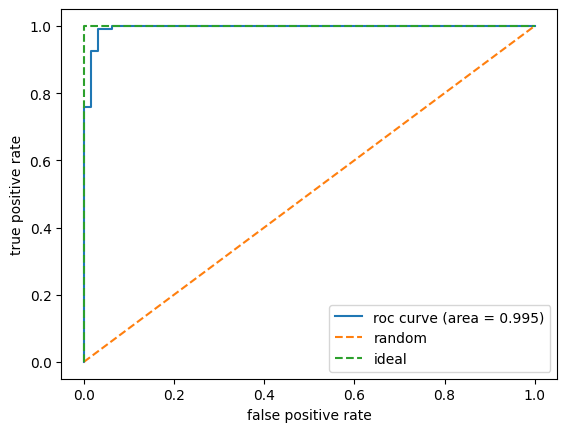

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve , auc
Y_score = lr_b_cancer.predict_proba(X_test)[:, 1]
fpr , tpr , thresholds = roc_curve(y_true=Y_test, y_score=Y_score)
plt.plot(fpr , tpr , label='roc curve (area = %0.3f)' % auc (fpr , tpr ))
plt.plot([0, 1], [0, 1], linestyle='--', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()